<a href="https://colab.research.google.com/github/drgennaroimperatore/AnimalDiseaseQueryWebPage/blob/master/PlanetApi1603.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Model

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz
!tar -xvf faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz

--2022-02-07 14:16:40--  http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.73.208, 2607:f8b0:4004:829::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.73.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353643040 (337M) [application/x-tar]
Saving to: ‘faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz.1’

faster_rcnn_resnet1 100%[===================>] 337.26M   219MB/s    in 1.5s    

2022-02-07 14:16:41 (219 MB/s) - ‘faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz.1’ saved [353643040/353643040]

faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/checkpoint
faster_rcnn_resnet101_v1_640x640_co

In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip


--2022-02-08 12:51:03--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.74.100
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.74.100|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  67.6MB/s    in 3.6s    

2022-02-08 12:51:07 (67.6 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [ ]:
!ls val2017



loading annotations into memory...
Done (t=0.73s)
creating index...
index created!
COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
indoor accessory sports appliance electronic food person kitchen furniture outdoor vehicle animal


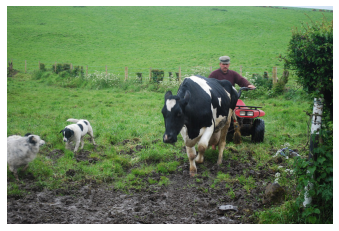

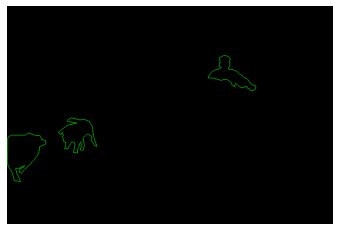

In [ ]:
import numpy as np
import os
import sys
# import tensorflow as tf
import cv2
from matplotlib import pyplot as plt
# inside jupyter uncomment next line 
# %matplotlib inline
import random
import time
from pycocotools.coco import COCO
import skimage.io as io


def draw_segmentation_mask(img,anns):
    for ann in anns:
        for seg in ann['segmentation']:
            poly = np.array(seg).reshape((int(len(seg)/2), 2))
        cv2.fillConvexPoly(img,np.int32([poly]), color=(255, 255, 255) )
    return cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

def draw_segmentation_boundary(img,anns):
    for ann in anns:
        for seg in ann['segmentation']:
            poly = np.array(seg).reshape((int(len(seg)/2), 2))
        cv2.polylines(img, np.int32([poly]), True, color=(0, 255, 0))
    return img

def main():
    annFile='annotations/instances_val2017.json'
    coco=COCO(annFile)
    # display COCO categories and supercategories
    cats = coco.loadCats(coco.getCatIds())
    nms=[cat['name'] for cat in cats]
    print('COCO categories: \n{}\n'.format(' '.join(nms)))

    nms = set([cat['supercategory'] for cat in cats])
    print('COCO supercategories: \n{}'.format(' '.join(nms)))

    # get all images containing given categories, select one at random
    catIds = coco.getCatIds(catNms=['person','dog']);
    imgIds = coco.getImgIds(catIds=catIds );
    # imgIds = coco.getImgIds(imgIds = [324158])
    img_meta = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
    
    I = io.imread(img_meta['coco_url'])
    cv_img = I.copy()
    plt.imshow(cv_img)
    plt.axis('off')
    plt.show()

    annIds = coco.getAnnIds(imgIds=img_meta['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    # print(anns)

    # create mask of zero
    mask = np.zeros(cv_img.shape, dtype=np.uint8)
    mask = draw_segmentation_boundary(mask, anns)
    plt.imshow(mask, cmap='gray')
    plt.axis('off')
    plt.show()
    

main()

In [ ]:
!pip install youtube-dl==2020.12.2

     |████████████████████████████████| 1.8 MB 4.9 MB/s 


In [ ]:
import numpy as np
import cv2
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import pafy
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
import random
import time
sys.path.append("..")
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

# What model to download.
# ssd_inception_v2_coco_2017_11_17
# faster_rcnn_inception_v2_coco_2017_11_08
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
# MODEL_NAME = 'faster_rcnn_inception_v2_coco_2017_11_08'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')

NUM_CLASSES = 90

# create youtube capture
url = 'https://www.youtube.com/watch?v=fq-X9UZMLRk'
videoPafy = pafy.new(url)



def load_label_dict(PATH_TO_LABELS):
  label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
  categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
  category_index = label_map_util.create_category_index(categories)
  #print(category_index)
  return category_index 






def show_cv_img_with_detections(img, dets,scores, classes,thres=0.4):
    height = img.shape[0]
    width = img.shape[1]
    colors = dict()
    
    for i in range(dets.shape[0]):

        cls_id = int(classes[i])
        # print(cls_id)
        if cls_id >= 0:
            score = scores[i]

            if score > thres:
                if cls_id not in colors:
                  colors[cls_id] = (random.random(), random.random(), random.random())
                xmin = int(dets[i, 1] * width)
                ymin = int(dets[i, 0] * height)
                xmax = int(dets[i, 3] * width)
                ymax = int(dets[i, 2] * height)

                # print(xmin, ymin, xmax, ymax)
                cv2.rectangle(img, (xmin, ymin), (xmax, ymax), colors[cls_id])
                class_name = str(category_index[cls_id]['name'])
                cv2.putText(img, '{:s} {:.3f}'.format(class_name, score), (xmin, ymin), cv2.FONT_HERSHEY_PLAIN, 0.5, colors[cls_id])
                
    return img


def show_mpl_img_with_detections(img, dets,scores, classes,thres=0.6):
    
    import matplotlib.pyplot as plt
    import random
    plt.figure(figsize=(8,6))
    plt.imshow(img)
    height = img.shape[0]
    width = img.shape[1]
    colors = dict()
    # dets = dets[0]
    # print(dets.shape)
    for i in range(dets.shape[0]):

        cls_id = int(classes[i])
        # print(cls_id)
        if cls_id >= 0:
            score = scores[i]

            if score > thres:
                if cls_id not in colors:
                  colors[cls_id] = (random.random(), random.random(), random.random())
                xmin = int(dets[i, 1] * width)
                ymin = int(dets[i, 0] * height)
                xmax = int(dets[i, 3] * width)
                ymax = int(dets[i, 2] * height)
                rect = plt.Rectangle((xmin, ymin), xmax - xmin,
                                     ymax - ymin, fill=False,
                                     edgecolor=colors[cls_id],
                                     linewidth=2.5)
                plt.gca().add_patch(rect)
                class_name = str(category_index[cls_id]['name'])
                
                plt.gca().text(xmin, ymin - 2,
                               '{:s} {:.3f}'.format(class_name, score),
                               bbox=dict(facecolor=colors[cls_id], alpha=0.5),
                               fontsize=8, color='white')
    plt.axis('off')
    plt.savefig(filename)
    plt.close()
    plt.pause(0.001)
    # cv2.imwrite(filename,img)
    return 

# download model 
opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
  file_name = os.path.basename(file.name)
  if 'frozen_inference_graph.pb' in file_name:
    tar_file.extract(file, os.getcwd())

# import frozen graph
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

# load labels
category_index = load_label_dict(PATH_TO_LABELS)


best = videoPafy.getbest(preftype="webm")
cap = cv2.VideoCapture(videoPafy.videostreams[2].url)
# cap = cv2.VideoCapture(best.url)
# run session
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    # g = tf.get_default_graph()
    # print(g.get_operations())

    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    skip = 5
    while(True):
      # Capture frame-by-frame
      ret, frame = cap.read()
      if skip != 0:
        skip -=1
      skip = 5 
      frame_bgr = frame
      frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)



      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      # image_np = load_image_into_numpy_array(frame)
      image_np = np.asarray(frame,dtype=np.uint8)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      # Actual detection.
      # (boxes, scores, classes, num) = sess.run(
      #     [detection_boxes, detection_scores, detection_classes, num_detections],
      #     feed_dict={image_tensor: image_np_expanded})
      # print(classes)
      # out = show_cv_img_with_detections(frame_bgr, boxes[0],scores[0], classes[0], thres=0.45)
      
      cv2.imshow('frame',frame_bgr)
      if cv2.waitKey(1) & 0xFF == ord('q'):
        
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

KeyError: ignored

In [ ]:
!git clone https://github.com/tensorflow/models.git
!cd models/research

fatal: destination path 'models' already exists and is not an empty directory.


In [ ]:
with open ('models/research/object_detection/data/mscoco_label_map.pbtxt') as f:
  lines = (f.readlines())

for line in lines:
  print (line)
  


item {

  name: "/m/01g317"

  id: 1

  display_name: "person"

}

item {

  name: "/m/0199g"

  id: 2

  display_name: "bicycle"

}

item {

  name: "/m/0k4j"

  id: 3

  display_name: "car"

}

item {

  name: "/m/04_sv"

  id: 4

  display_name: "motorcycle"

}

item {

  name: "/m/05czz6l"

  id: 5

  display_name: "airplane"

}

item {

  name: "/m/01bjv"

  id: 6

  display_name: "bus"

}

item {

  name: "/m/07jdr"

  id: 7

  display_name: "train"

}

item {

  name: "/m/07r04"

  id: 8

  display_name: "truck"

}

item {

  name: "/m/019jd"

  id: 9

  display_name: "boat"

}

item {

  name: "/m/015qff"

  id: 10

  display_name: "traffic light"

}

item {

  name: "/m/01pns0"

  id: 11

  display_name: "fire hydrant"

}

item {

  name: "/m/02pv19"

  id: 13

  display_name: "stop sign"

}

item {

  name: "/m/015qbp"

  id: 14

  display_name: "parking meter"

}

item {

  name: "/m/0cvnqh"

  id: 15

  display_name: "bench"

}

item {

  name: "/m/015p6"

  id: 16

  displ

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz
!tar -xvf ssd_inception_v2_coco_2017_11_17.tar.gz

--2022-02-14 10:32:21--  http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.97.128, 2404:6800:4008:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.97.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278126337 (265M) [application/x-tar]
Saving to: ‘ssd_inception_v2_coco_2017_11_17.tar.gz.2’

ssd_inception_v2_co 100%[===================>] 265.24M   245MB/s    in 1.1s    

2022-02-14 10:32:23 (245 MB/s) - ‘ssd_inception_v2_coco_2017_11_17.tar.gz.2’ saved [278126337/278126337]

ssd_inception_v2_coco_2017_11_17/
ssd_inception_v2_coco_2017_11_17/model.ckpt.index
ssd_inception_v2_coco_2017_11_17/model.ckpt.meta
ssd_inception_v2_coco_2017_11_17/frozen_inference_graph.pb
ssd_inception_v2_coco_2017_11_17/model.ckpt.data-00000-of-00001
ssd_inception_v2_coco_2017_11_17/saved_model/
ssd_inception_v2_coco_2017_11_17/saved_model

In [ ]:
#!wget http://images.cocodataset.org/zips/val2017.zip
#!unzip val2017
!wget http://images.cocodataset.org/zips/test2017.zip
!unzip test2017

--2022-02-14 10:32:27--  http://images.cocodataset.org/zips/test2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.98.20
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.98.20|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6646970404 (6.2G) [application/zip]
Saving to: ‘test2017.zip.2’

test2017.zip.2      100%[===================>]   6.19G  16.5MB/s    in 7m 2s   

2022-02-14 10:39:30 (15.0 MB/s) - ‘test2017.zip.2’ saved [6646970404/6646970404]

Archive:  test2017.zip
replace test2017/000000259564.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
#!protoc object_detection/protos/*.proto --python_out=.
!ls test2017

In [ ]:
!pip install python-utils
!pip install utils
!pip install object-detection-0.1
!pip install label

In [ ]:
import numpy as np
import os
import sys
%tensorflow_version 1.x
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt
# inside jupyter uncomment next line 
# %matplotlib inline
import random
import time
#from utils import label_map_util
from object_detection.utils import label_map_util 

TensorFlow 1.x selected.


In [ ]:


def load_and_create_graph(path_to_pb):
    """
    Loads pre-trained graph from .pb file. 
    path_to_pb: path to saved .pb file
    Tensorflow keeps graph global so nothing is returned
    """
    with tf.gfile.FastGFile(path_to_pb, 'rb') as f:
        # initialize graph definition
        graph_def = tf.GraphDef()
        # reads file 
        graph_def.ParseFromString(f.read())
        # imports as tf.graph
        _ = tf.import_graph_def(graph_def, name='')

In [ ]:
!apt install object-detection

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package object-detection


In [ ]:
load_and_create_graph('ssd_inception_v2_coco_2017_11_17/frozen_inference_graph.pb')

Instructions for updating:
Use tf.gfile.GFile.


In [ ]:

# load labels for classes output
path_to_labels = os.path.join('models/research/object_detection/data', 'mscoco_label_map.pbtxt')
# pre-training was done on 90 categories
nb_classes = 90
label_map = label_map_util.load_labelmap(path_to_labels)
categories = label_map_util.convert_label_map_to_categories(label_map,
                   max_num_classes=nb_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [ ]:
def read_cv_image(filename):
    """
    Reads an input color image and converts to RGB order
    Returns image as an array
    """
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [ ]:
# upload file using explorer
from google.colab import files
uploaded = files.upload()
for k, v in uploaded.items():
  open(k, 'wb').write(v)
img_name = list(uploaded)[0]

# read an image from file
img2 = cv2.imread(img_name)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

Saving person1.png to person1.png


In [ ]:
def show_mpl_img_with_detections(img, dets, scores, 
                                 classes, category_index, 
                                 thres=0.6):
    """
    Applies thresholding to each box score and 
    plot bbox results on image. 
    img: input image as numpy array
    dets: list of K detection outputs for given image.(size:[1,K])
    scores: list of detection score for each detection output(size: [1,K]).
    classes: list of predicted class index(size: [1,K]) 
    category_index: dictionary containing mapping from class index to class name. 
    thres: threshold to filter detection boxes:(default: 0.6)
    By default K:100 detections
    """
    # plotting utilities from matplotlib
    plt.figure(figsize=(12,8))
    plt.imshow(img)
    height = img.shape[0]
    width = img.shape[1]
    # To use common color of one class and different for different classes
    colors = dict() 
    # iterate over all proposed bbox 
    # choose whichever is more than a threshold
    for i in range(dets.shape[0]):
        cls_id = int(classes[i])
        # in case of any wrong prediction for class index
        if cls_id >= 0:
            
            score = scores[i]
            # score for a detection is more than a threshold
            if score > thres:
                if cls_id not in colors:
                    colors[cls_id] = (random.random(), 
                                      random.random(), 
                                      random.random())
                xmin = int(dets[i, 1] * width)
                ymin = int(dets[i, 0] * height)
                xmax = int(dets[i, 3] * width)
                ymax = int(dets[i, 2] * height)
                rect = plt.Rectangle((xmin, ymin), xmax - xmin,
                                     ymax - ymin, fill=False,
                                     edgecolor=colors[cls_id],
                                     linewidth=2.5)
                plt.gca().add_patch(rect)
                # to plot class name and score around each detection box
                class_name = str(category_index[cls_id]['name'])
                
                plt.gca().text(xmin, ymin - 2,
                           '{:s} {:.3f}'.format(class_name, score),
                           bbox=dict(facecolor=colors[cls_id], alpha=0.5),
                           fontsize=8, color='white')
    plt.axis('off')
    plt.show()

    return

In [ ]:
image_dir = 'test2017/'
# create graph object from previously loaded graph
# tensorflow previously loaded graph as default 
graph=tf.get_default_graph()

# launch a session to run this graph 
with tf.Session(graph=graph) as sess:
    # get input node
    image_tensor = graph.get_tensor_by_name('image_tensor:0')
    
    # get output nodes
    detection_boxes = graph.get_tensor_by_name('detection_boxes:0')
    detection_scores = graph.get_tensor_by_name('detection_scores:0')
    detection_classes = graph.get_tensor_by_name('detection_classes:0')
    num_detections = graph.get_tensor_by_name('num_detections:0')
    
    # read image from file and pre-process it for input.
    # Note: we can do this outside session scope too.  
    # read image from file and pre-process it for input.
    input_img = img2[np.newaxis, :, :, :]
    
    # To compute prediction time 
    start = time.time()
    # Run prediction and get 4 outputs
    (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: input_img})
    end = time.time()
    print("Prediction time:",end-start,"secs for ", num, "detections")
    
    # display results with score threshold of 0.6
    # Since only one image is used , hence we use 0 index for outputs
    #show_mpl_img_with_detections(image, boxes[0],scores[0], classes[0], thres=0.6)

Prediction time: 3.00952410697937 secs for  [100.] detections


In [ ]:
print (classes[])

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. 32.  1.  1.
   1. 38.  1.  1.  1.  1.  1.  1.  1.  1. 32.  1.  1.  1. 62.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. 32.  1.  1.  1.  1.
   1.  1.  1.  1.  1. 31. 62. 32.  1.  1.  1. 62.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1. 62.]]


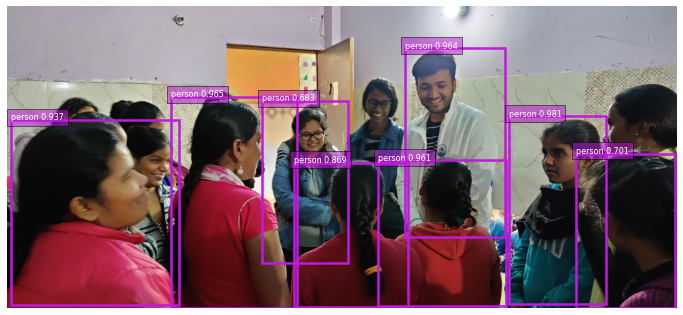

In [ ]:
show_mpl_img_with_detections(img2,boxes[0],scores[0],classes[0],
                             category_index,thres=0.6)

# Planet API
API KEY PLAK3e370db3caca4b0a9f71ca25c9299263


In [ ]:
!pip install planet
!pip install mercantile


In [65]:
!pip install pyproj
!ls

'BRITPITS (1).xlsx'				   quarriestiles
 BRITPITS.xlsx					   quarries.zip
'caveattive2012attivitainproduzione2014 (1).csv'   sample_data
 caveattive2012attivitainproduzione2014.csv


In [64]:
# upload file using explorer
from google.colab import files
uploaded = files.upload()
listofQuarriesCSVUmbria=uploaded["caveattive2012attivitainproduzione2014.csv"]
listOfQuarriesUKSample = uploaded["BRITPITS.xlsx"]

Saving BRITPITS.xlsx to BRITPITS (1).xlsx


In [ ]:
import pandas as pd

dfUmbria = pd.read_csv(listofQuarriesCSVUmbria, sep='"";""', delimiter=None, header='infer', names=None, index_col=None, engine='python')

lon=[]
lat=[]
for index, row  in dfUmbria.iterrows():
  
  lon.append(float(row["Long WGS84 <EPSG 4326>\"\"\",,"].replace('"','').replace(",",".")))
  lat.append(float(row["Lat WGS84 <EPSG 4326>"].replace('"','').replace(",",".")))






In [76]:
from pyproj import Proj, Transformer
from pyproj import Proj, transform
#National Grid of Great Britain. #EPSG:27700

dfUK=pd.read_excel(listOfQuarriesUKSample)
#dfUK


P27700 = Proj(init='epsg:27700')
P4326 = Proj(init='epsg:4326')

#transformer = Transformer.from_crs("epsg:4326","epsg:3857", always_xy=True)
#tX,tY=transformer.transform(testLon, testLat)
print(str(tX)+" "+str(tY))

for index, row in dfUK.iterrows():
  easting = float(row["Easting"])
  northing = float(row["Northing"])
  convLon,convLat = transform(P27700, P4326, easting, northing,always_xy=True)
  print ("Lat {},Lon {}".format(convLat,convLon))
  lon.append(convLon)
  lat.append(convLat)
print(len(lon))

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1


-2.1857832839343443 56.99132146760675
Lat 57.42327566347849,Lon -1.8551253528995169
Lat 57.25354928089987,Lon -2.0944545912576693
Lat 57.44347158196241,Lon -1.8099812187761073
Lat 57.522153927962385,Lon -1.9432205403228109
Lat 57.38356546462663,Lon -2.3977515452293234
Lat 57.637140066814766,Lon -1.9832378149430714
Lat 57.19670519661813,Lon -2.5949025430419668
Lat 56.90244659640334,Lon -2.294685867005654
Lat 57.66458268111566,Lon -2.4642652939795626
Lat 57.17194667292114,Lon -2.4456660514643858
Lat 57.07802091693313,Lon -2.6258277488458837
Lat 57.62960044924253,Lon -2.450673805469765
Lat 57.077344170717666,Lon -2.099366124553241
Lat 57.24236183558347,Lon -2.436242999306949
Lat 57.07855921353678,Lon -2.096400141515761
Lat 57.331827790244404,Lon -2.450092545167746
Lat 57.47258121411871,Lon -1.8910275191235273
Lat 57.463616691052394,Lon -1.7966251061380583
Lat 57.45922890265887,Lon -1.876650334553572
Lat 57.24307910824602,Lon -2.395987949181671
Lat 57.387973930621676,Lon -2.144288574677774

In [72]:
print(str(lat[2]) +" " +str(lon[2]))

42.7605 12.4263


In [ ]:
import os
import json
import requests
from requests.auth import HTTPBasicAuth

item_type = "PSScene3Band" # despite the documentation suggesting a migration to PSScene, the basemap api says that global mosaic is only available in resortho and 3band



def get_image_From_LatLon(latitude, longitude,yyyy,mm,usePoint=True,squaresize=1.0):
  
  
  geojson_point = { "type": "Point", "coordinates": [longitude, latitude] }

 # geojson_square = { "type": "Polygon", "coordinates": [[
                                                        #[easting-(squaresize/2), northing+(squaresize/2)],
                                                       # [easting+(squaresize/2), northing+(squaresize/2)],
                                                       # [easting-(squaresize/2), northing-(squaresize/2)],
                                                       # [easting+(squaresize/2), northing-(squaresize/2)]
                                                       # ]] 
                  #  }

  #if(usePoint):
  geojson_geometry= geojson_point
  #else:
    #geojson_geometry= geojson_square

  # get images that overlap with our AOI 
  geometry_filter = {
    "type": "GeometryFilter",
    "field_name": "geometry",
    "config": geojson_geometry
  }

  dateend ="{year}-{month}-28T23:59:00.000Z".format(year = yyyy, month = mm)
  datebegin ="{year}-{month}-01T00:00:00.000Z".format(year = yyyy, month = mm)
  # get images acquired within a date range
  date_range_filter = {
    "type": "DateRangeFilter",
    "field_name": "acquired",
    "config": {
      "gte": datebegin,
      "lte": dateend
    }
  }

  # only get images which have <50% cloud coverage
  cloud_cover_filter = {
    "type": "RangeFilter",
    "field_name": "cloud_cover",
    "config": {
      "lte": 0.2
    }
  }

  # combine our geo, date, cloud filters
  combined_filter = {
    "type": "AndFilter",
    "config": [geometry_filter, date_range_filter, cloud_cover_filter]
  }

 

  # API request object
  search_request = {
    "item_types": [item_type], 
    "filter": combined_filter
  }


  search_result = \
    requests.post(
      'https://api.planet.com/data/v1/quick-search',
      auth=HTTPBasicAuth( 'PLAK3e370db3caca4b0a9f71ca25c9299263',''),
      json=search_request)

  #print(json.dumps(search_result.json(), indent=1))

  


  # extract image IDs only
  image_ids = [feature['id'] for feature in search_result.json()['features']]
  coords = [feature['geometry']["coordinates"] for feature in search_result.json()['features']]
  print("Found "+str(len(image_ids))+" images")
  print (coords)
  if(len(image_ids)==0):
    print ("No images. Stopping exec")
    return
  return image_ids,coords
  



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from io import BytesIO

def getMosaic(mosaicName):
  mosaicUrl ="https://api.planet.com/basemaps/v1/mosaics"
  parameters ={"name__contains" : mosaicName,  "api_key":'PLAK3e370db3caca4b0a9f71ca25c9299263'}
  
  mosaic_search_result= \
  requests.get(
      mosaicUrl,
     parameters,
      )
  
  #print(json.dumps(mosaic_search_result.json(),indent=1))
   # extract image IDs only
  mosaic_ids = [mosaics['id'] for mosaics in mosaic_search_result.json()['mosaics']]
  bboxes =  [bbox['bbox'] for bbox in mosaic_search_result.json()['mosaics']]
  print(len(mosaic_ids))
  print(len(bboxes))

  return mosaic_ids,bboxes

def getMosaicURL(mosaicName):
  mosaicUrl ="https://api.planet.com/basemaps/v1/mosaics"
  parameters ={"name__contains" : mosaicName,  "api_key":'PLAK3e370db3caca4b0a9f71ca25c9299263'}
  
  mosaic_search_result= \
  requests.get(
      mosaicUrl,
     parameters,
      )
  
  #print(json.dumps(mosaic_search_result.json(),indent=1))
   # extract image IDs only
  links = [mosaics['_links']["tiles"] for mosaics in mosaic_search_result.json()['mosaics']]
 

  return links


def listMosaicQuads(mosaicID,bbox):
   mosaicListUrl ="https://api.planet.com/basemaps/v1/mosaics/{}/quads".format(mosaicID)
   print(mosaicID)
   parameters ={ "api_key":'PLAK3e370db3caca4b0a9f71ca25c9299263', "bbox":bbox}
  
   mosaicList_search_result= \
  requests.get(
      mosaicListUrl,
     parameters,
      )
   print(mosaicList_search_result.url)
   search_json= mosaicList_search_result.json()
   if ("items" not in search_json):
     return
   items =search_json["items"][0]["_links"]["thumbnail"]
   print(items)
   
   
   result = \
    requests.get(
      items,
      )
   thumbTile=Image.open(BytesIO(result.content))
   imgArray =np.asarray(thumbTile)
   plt.imshow(imgArray)
   plt.show()
  
mosaicIDs,bboxes =getMosaic("global")
urls= getMosaicURL("global")

for u in urls:
  print(u)


#for mid,bbox in zip(mosaicIDs,bboxes):
 # bboxSt=""
  #i=0
  #for bb in bbox:
   # bboxSt +=str(bb)
    #if i <len(bbox)-1:
     # bboxSt +=","
    #i+=1 
  #print (bboxSt)
  #listMosaicQuads(mid,bboxSt)






50
50
https://tiles.planet.com/basemaps/v1/planet-tiles/global_monthly_2016_01_mosaic/gmap/{z}/{x}/{y}.png?api_key=PLAK3e370db3caca4b0a9f71ca25c9299263
https://tiles.planet.com/basemaps/v1/planet-tiles/global_monthly_2016_02_mosaic/gmap/{z}/{x}/{y}.png?api_key=PLAK3e370db3caca4b0a9f71ca25c9299263
https://tiles.planet.com/basemaps/v1/planet-tiles/global_monthly_2016_03_mosaic/gmap/{z}/{x}/{y}.png?api_key=PLAK3e370db3caca4b0a9f71ca25c9299263
https://tiles.planet.com/basemaps/v1/planet-tiles/global_monthly_2016_04_mosaic/gmap/{z}/{x}/{y}.png?api_key=PLAK3e370db3caca4b0a9f71ca25c9299263
https://tiles.planet.com/basemaps/v1/planet-tiles/global_monthly_2016_05_mosaic/gmap/{z}/{x}/{y}.png?api_key=PLAK3e370db3caca4b0a9f71ca25c9299263
https://tiles.planet.com/basemaps/v1/planet-tiles/global_monthly_2016_06_mosaic/gmap/{z}/{x}/{y}.png?api_key=PLAK3e370db3caca4b0a9f71ca25c9299263
https://tiles.planet.com/basemaps/v1/planet-tiles/global_monthly_2016_07_mosaic/gmap/{z}/{x}/{y}.png?api_key=PLAK3e370

In [ ]:

import requests

#import IPython.display

def get_thumbnail(imageid):
 id0 = imageid
 id0_url =  "https://tiles.planet.com/data/v1/item-types/{}/items/{}/thumb".format(item_type, id0)
  #Returns JSON metadata for assets in this ID. Learn more: planet.com/docs/reference/data-api/items-assets/#asset
 result = \
    requests.get(
      id0_url,
      auth=HTTPBasicAuth('PLAK3e370db3caca4b0a9f71ca25c9299263','')
      )
 img = Image.open(BytesIO(result.content))
 display(img)


In [ ]:
def get_image_link(imageid):
# For demo purposes, just grab the first image ID
  id0 = imageid
  
  id0_url = 'https://api.planet.com/data/v1/item-types/{}/items/{}/assets'.format(item_type, id0)

# Returns JSON metadata for assets in this ID. Learn more: planet.com/docs/reference/data-api/items-assets/#asset
  result = \
    requests.get(
      id0_url,
      auth=HTTPBasicAuth('PLAK3e370db3caca4b0a9f71ca25c9299263','')
    )

  # List of asset types available for this particular satellite image
  print(result.json())

    # This is "inactive" if the "analytic" asset has not yet been activated; otherwise 'active'
  #print(result.json()['analytic']['status'])

  # Parse out useful links
  links = result.json()["visual"]["_links"]
  self_link = links["_self"]
  #print(links)
  
  res= requests.get(
    self_link,
    auth=HTTPBasicAuth('PLAK3e370db3caca4b0a9f71ca25c9299263','')
  )
  #print(res.json())
  

  #status = activation_status_result.json()["status"]


  activation_link = links["activate"]

  # Request activation of the 'analytic' asset:
  activate_result = \
    requests.get(
      activation_link,
      auth=HTTPBasicAuth('PLAK3e370db3caca4b0a9f71ca25c9299263','')
    )

  activation_status_result = \
    requests.get(
      self_link,
      auth=HTTPBasicAuth('PLAK3e370db3caca4b0a9f71ca25c9299263','')
    )

  import time, threading

  WAIT_SECONDS = 1


  status = activation_status_result.json()["status"]
  print(status)
    
  while(status=="activating"):
    activation_status_result = \
  requests.get(
    self_link,
    auth=HTTPBasicAuth('PLAK3e370db3caca4b0a9f71ca25c9299263','')
  )

    status = activation_status_result.json()["status"]
    #print(activation_status_result.json())

  download_link = activation_status_result.json()["location"]
  print(download_link)

  return download_link


##Tile Api

In [ ]:
!pwd

/content


In [58]:
import os
import mercantile

saveFilePath="/content/quarriestiles"

def getTile2(id,lon,lat,z, year="2020",month="07",filename="test.png"):
  tileInfo= mercantile.tile(lon,lat,z)
  print("MercX:{} MercY:{}".format(tileInfo.x,tileInfo.y)) 
  print(tileInfo)
  #x,y = getTileWithMercatorFormula(lat,lon,z)
  #tileURL = "https://tiles.planet.com/data/v1/{}/{}/{}/{}/{}.png?api_key={}".format( item_type,id,z,y,x,'PLAK3e370db3caca4b0a9f71ca25c9299263')
  tileURLV2 = "https://tiles.planet.com/basemaps/v1/planet-tiles/global_monthly_{}_{}_mosaic/gmap/{}/{}/{}.png?api_key={}".format(year, month, z,tileInfo.x,tileInfo.y,'PLAK3e370db3caca4b0a9f71ca25c9299263')
  tileURLV2ShiftRight = "https://tiles.planet.com/basemaps/v1/planet-tiles/global_monthly_{}_{}_mosaic/gmap/{}/{}/{}.png?api_key={}".format(year, month, z,tileInfo.x+1,tileInfo.y,'PLAK3e370db3caca4b0a9f71ca25c9299263')
  tileURLV2ShiftDown = "https://tiles.planet.com/basemaps/v1/planet-tiles/global_monthly_{}_{}_mosaic/gmap/{}/{}/{}.png?api_key={}".format(year, month, z,tileInfo.x,tileInfo.y+1,'PLAK3e370db3caca4b0a9f71ca25c9299263')
  tileURLV2ShiftDownRight = "https://tiles.planet.com/basemaps/v1/planet-tiles/global_monthly_{}_{}_mosaic/gmap/{}/{}/{}.png?api_key={}".format(year, month, z,tileInfo.x+1,tileInfo.y+1,'PLAK3e370db3caca4b0a9f71ca25c9299263')
  #print(tileURLV2)
  #print (tileURLV2ShiftRight)

  tile_request_result =requests.get(tileURLV2)
  tile_shiftRight_request_result =requests.get(tileURLV2ShiftRight)
  tile_shiftDown_request_result =requests.get(tileURLV2ShiftDown)
  tile_shiftDownRight_request_result =requests.get(tileURLV2ShiftDownRight)

  img = Image.open(BytesIO(tile_request_result.content))
  img2 =Image.open(BytesIO(tile_shiftRight_request_result.content))
  img3=Image.open(BytesIO(tile_shiftDown_request_result.content))
  img4=Image.open(BytesIO(tile_shiftDownRight_request_result.content))


  imgArray =np.asarray(img)
  imgArray2= np.asarray(img2)
  imgArray3= np.asarray(img3)
  imgArray4= np.asarray(img4)
  imgArray = np.concatenate((imgArray, imgArray2), axis = 1)
  imgSecondRow =np.concatenate((imgArray3, imgArray4), axis = 1)
  imgArray=np.concatenate((imgArray, imgSecondRow), axis = 0)

  imgOutput = Image.fromarray(imgArray, 'RGB')
  
  isExist = os.path.exists(saveFilePath)
  if not isExist:
    os.makedirs(saveFilePath)   
  outputPath=saveFilePath+"/"+filename
  img.save(outputPath)

  #plt.imshow(imgArray)
  #plt.show()
  #files.download(outputPath)
 

In [59]:
import mercantile

def getTile(id,lon,lat,z, year="2020",month="07", filename="test.png"):
  tileInfo= mercantile.tile(lon,lat,z)
  print("MercX:{} MercY:{}".format(tileInfo.x,tileInfo.y)) 
  print(tileInfo)
  #x,y = getTileWithMercatorFormula(lat,lon,z)
  #tileURL = "https://tiles.planet.com/data/v1/{}/{}/{}/{}/{}.png?api_key={}".format( item_type,id,z,x,y,'PLAK3e370db3caca4b0a9f71ca25c9299263')
  tileURLV2 = "https://tiles.planet.com/basemaps/v1/planet-tiles/global_monthly_{}_{}_mosaic/gmap/{}/{}/{}.png?api_key={}".format(year, month, z,tileInfo.x,tileInfo.y,'PLAK3e370db3caca4b0a9f71ca25c9299263')
  
  #print (tileURLV2ShiftRight)

  tile_request_result =requests.get(tileURLV2)
  img = Image.open(BytesIO(tile_request_result.content))
  imgArray =np.asarray(img)

  isExist = os.path.exists(saveFilePath)
  if not isExist:
    os.makedirs(saveFilePath)   
  outputPath=saveFilePath+"/"+filename
  img.save(outputPath)


  #plt.imshow(imgArray)
  #plt.show()
 

In [ ]:
def getTileFromData(id,lon,lat,z, year="2020",month="07"):
  tileInfo= mercantile.tile(lon,lat,z)
  print("MercX:{} MercY:{}".format(tileInfo.x,tileInfo.y)) 
  print(tileInfo)
  #x,y = getTileWithMercatorFormula(lat,lon,z)
  tileURL = "https://tiles.planet.com/data/v1/{}/{}/{}/{}/{}.png?api_key={}".format( item_type,id,z,tileInfo.x,tileInfo.y,'PLAK3e370db3caca4b0a9f71ca25c9299263')
  print(tileURL)
  

  tile_request_result =requests.get(tileURL)
  img = Image.open(BytesIO(tile_request_result.content))
  imgArray =np.asarray(img)
  plt.imshow(imgArray)
  plt.show()


In [ ]:
import math
def getTileWithMercatorFormula(lat, lon, zoom):
  latRad = lat * math.pi / 180;
  n = pow(2, zoom);
  xTile = n * ((lon + 180) / 360);
  yTile = n * (1-(math.log(math.tan(latRad) + 1/math.cos(latRad)) /math.pi)) / 2;
  print("X:{} Y:{}".format(xTile,yTile)) 

  return xTile,yTile


##Open Street Map API

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import math
from PIL import Image
  
  
    
def getImageCluster(lat_deg, lon_deg, delta_lat,  delta_long, zoom):
    smurl = r"http://a.tile.openstreetmap.org/{0}/{1}/{2}.png"

    #xmin, ymax =deg2num(lat_deg, lon_deg, zoom)
    #xmax, ymin =deg2num(lat_deg + delta_lat, lon_deg + delta_long, zoom)

    xminymax =mercantile.tile(lon_deg, lat_deg, zoom)
    xmaxymin=mercantile.tile(lon_deg + delta_long, lat_deg + delta_lat, zoom)
    xmax=xmaxymin.x
    ymax=xminymax.y
   
    xmin = xminymax.x 
    ymin = xmaxymin.y
    
    
  
    for xtile in range(xmin, xmax+1):
        for ytile in range(ymin,  ymax+1):
            try:
                imgurl=smurl.format(zoom, xtile, ytile)
                print("Opening: " + imgurl)
                imgstr = requests.get(imgurl)
                tile = Image.open(BytesIO(imgstr.content))
                plt.imshow(np.asarray(tile),'gray')
                
                plt.show()
                
            except Exception as e: 
                print(str(e))
               

    
    
   
  
   

    
    




##Function calls

In [77]:
#/*The approximate conversions are: Latitude: 1 deg = 110.574 km. Longitude: 1 deg = 111.320*cos(latitude) km*/
testLat =42.6637 
testLon = 12.4668

 


#transformer2 = Transformer.from_crs("epsg:4326","epsg:3857",  always_xy=True)
#x,y=transformer2.transform(x2, y2)
#print(str(x2[0])+" "+str(y2[1]))

index=-1


year ="2019"
month ="05"

#imageIDs,coords = get_image_From_LatLon(lat[index],lon[index],year,month,True)
print (str(lat[index])+" "+ str(lon[index]))
#for id,coord in zip(imageIDs,coords):
  #get_image_link(id)
  #print(coord)
  #get_thumbnail(id)
for lt,ln in zip(lat, lon):
  index+=1
  #if index>4: 
   # break
  print("{}  {}".format(lt,ln))
  for z in range(14,15):
    print ("-------------------------------------------------------")
    print("Zoom Level {}".format(z))
    
    getTile(id,ln,lt,z,year,month,"quarryAndNeighbours{}.png".format(str(index)))
    getTile2(id,ln,lt,z,year,month,"quarry{}.png".format(str(index)))
    #getTileFromData(id,ln,lt,z,year,month)
    #getImageCluster(lt, ln, 0.00,  0.00, z)
    #getTileFromData(id,lon,lat,15,year,month)
  



56.99132146760675 -2.1857832839343443
42.5421  12.4844
-------------------------------------------------------
Zoom Level 14
MercX:8760 MercY:6048
Tile(x=8760, y=6048, z=14)
MercX:8760 MercY:6048
Tile(x=8760, y=6048, z=14)
42.7474  11.9789
-------------------------------------------------------
Zoom Level 14
MercX:8737 MercY:6035
Tile(x=8737, y=6035, z=14)
MercX:8737 MercY:6035
Tile(x=8737, y=6035, z=14)
42.7605  12.4263
-------------------------------------------------------
Zoom Level 14
MercX:8757 MercY:6035
Tile(x=8757, y=6035, z=14)
MercX:8757 MercY:6035
Tile(x=8757, y=6035, z=14)
42.9182  12.7516
-------------------------------------------------------
Zoom Level 14
MercX:8772 MercY:6025
Tile(x=8772, y=6025, z=14)
MercX:8772 MercY:6025
Tile(x=8772, y=6025, z=14)
42.6637  12.4668
-------------------------------------------------------
Zoom Level 14
MercX:8759 MercY:6041
Tile(x=8759, y=6041, z=14)
MercX:8759 MercY:6041
Tile(x=8759, y=6041, z=14)
42.7335  12.7021
--------------------

In [60]:
!ls

'caveattive2012attivitainproduzione2014 (1).csv'   quarriestiles   sample_data
 caveattive2012attivitainproduzione2014.csv	   quarries.zip


In [78]:
import os
import zipfile
    
def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file), 
                       os.path.relpath(os.path.join(root, file), 
                                       os.path.join(path, '..')))
      
zipf = zipfile.ZipFile('quarries.zip', 'w', zipfile.ZIP_DEFLATED)
zipdir(saveFilePath, zipf)
zipf.close()

files.download("quarries.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>